In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules
sns.set_style('whitegrid')

In [2]:
# Reading the data from  csv file and storing it in a dataframe
emp_data = pd.read_csv('Employee_skills_traits.csv')
# Displaying the first five colums from the dataset
emp_data.head()

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1


In [3]:
# Checking the number of objects and attributes
emp_data.shape

(998, 14)

In [4]:
# Checking the header line
emp_data.columns

Index(['ID', 'Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative '],
      dtype='object')

In [5]:
# Checking for any duplicate rows
emp_data.duplicated().sum()

0

In [6]:
# Checking for any missing values
emp_data.isna().sum()

ID                                       0
Employment period                        0
Time in current department               0
Gender                                   0
Team leader                              0
Age                                      0
Member of professional organizations     0
.Net                                     0
SQL Server                               0
HTML CSS Java Script                     0
PHP mySQL                                0
Fast working                             0
Awards                                   0
Communicative                            0
dtype: int64

In [7]:
# find duplicate IDs and sort by descending order
emp_data[emp_data.duplicated(['ID'], keep=False)].sort_values(['ID'])

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
575,911,13,8,0,1,33,0,1,1,1,1,0,0,1
778,911,17,8,0,0,37,0,0,1,1,0,0,1,1
390,2631,15,2,0,0,40,1,0,0,1,0,0,0,1
111,2631,8,3,1,0,41,1,0,0,1,0,0,0,1
535,4338,6,6,1,1,51,1,0,1,1,1,0,0,0
739,4338,8,4,0,0,38,1,1,0,0,1,1,0,0
22,5170,11,11,0,0,42,1,0,1,1,1,1,1,1
379,5170,19,12,0,0,42,0,1,0,1,1,1,0,0
117,5186,12,10,0,1,32,1,0,1,0,0,0,1,1
410,5186,1,1,1,1,40,1,1,1,1,0,0,0,1


In [8]:
# drop duplicate ID's and keep only the first occurrence
emp_data.drop_duplicates("ID", keep='first', inplace=True)

In [9]:
emp_data.shape
# number of rows have reduced since duplicate ID's were dropped

(974, 14)

In [10]:
# cross checking and further dropping rows based on certain conditions
# Condition - 1 ---> Age should be between 22 and 58
emp_data.drop(emp_data[emp_data['Age '] > 58].index, inplace = True)
emp_data.drop(emp_data[emp_data['Age '] < 22].index, inplace = True)
# Condition - 2 ---> Time in current department canno be more than the employment period
emp_data.drop(emp_data[emp_data['Time in current department '] > emp_data['Employment period ']].index, inplace = True)

In [11]:
# Marking ID as index as no further data mining will be done for ID
emp_data.set_index('ID',inplace=True)

In [12]:
# Replacing binary attribute Gender to nominal attribute for better representation
emp_data['Sex']=emp_data['Gender '].replace({1:"Male", 0:"Female"})
emp_data.drop(['Gender '], axis=1, inplace=True)

In [13]:
# Checking the final dataset after data pre-processing
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 6723 to 17170
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Employment period                      974 non-null    int64 
 1   Time in current department             974 non-null    int64 
 2   Team leader                            974 non-null    int64 
 3   Age                                    974 non-null    int64 
 4   Member of professional organizations   974 non-null    int64 
 5   .Net                                   974 non-null    int64 
 6   SQL Server                             974 non-null    int64 
 7   HTML CSS Java Script                   974 non-null    int64 
 8   PHP mySQL                              974 non-null    int64 
 9   Fast working                           974 non-null    int64 
 10  Awards                                 974 non-null    int64 
 11  Communicative 

In [14]:
# describe non-binary columns
emp_data[['Employment period ', 'Time in current department ', 'Age ']].describe()

,Employment period,Time in current department,Age
count,974.000000,974.000000,974.000000
mean,10.383984,5.666324,40.468172
std,5.803602,3.206903,8.080181
min,1.000000,1.000000,24.000000
25%,5.000000,3.000000,34.000000
50%,10.000000,5.000000,40.000000
75%,15.000000,8.000000,47.000000
max,20.000000,12.000000,55.000000


E:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

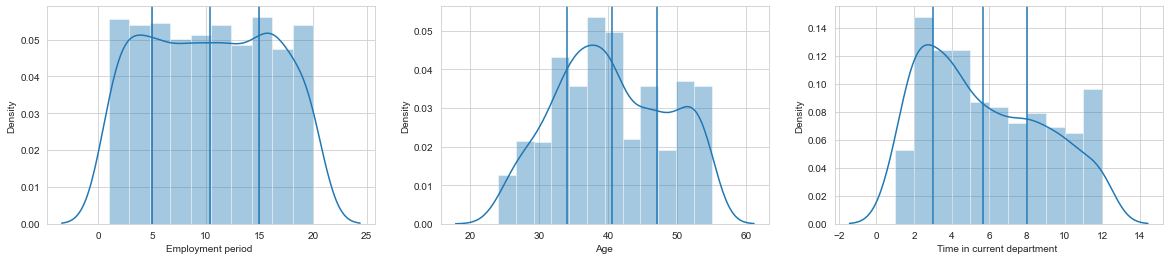

In [15]:
### Univariate Data Analysis
# plotting the distribution of non-binary attributes viz. Age, Time in current department and employment period

fig = plt.figure(figsize=(20,4))

# plt.subplot(131) means 1X3 grid and first figure (1,3,1). 
plt.subplot(131) 

sns.distplot(emp_data['Employment period '])
#plt.show()
plt.axvline(x=np.mean(emp_data['Employment period ']))
plt.axvline(x=np.percentile(emp_data['Employment period '],25))
plt.axvline(x=np.percentile(emp_data['Employment period '],75))

# 132 means 2nd figure of 1x3 grid
plt.subplot(132)

sns.distplot(emp_data['Age '])
#plt.show()
plt.axvline(x=np.mean(emp_data['Age ']))
plt.axvline(x=np.percentile(emp_data['Age '],25))
plt.axvline(x=np.percentile(emp_data['Age '],75))

# 133 means 3rd figure of 1x3 grid
plt.subplot(133)

sns.distplot(emp_data['Time in current department '])
#plt.show()
plt.axvline(x=np.mean(emp_data['Time in current department ']));
plt.axvline(x=np.percentile(emp_data['Time in current department '],25));
plt.axvline(x=np.percentile(emp_data['Time in current department '],75));

In [16]:
# Keep column numbers 0, 1 and 3 from the DataFrame
# Create a list of all column numbers to keep
# columns_to_keep = [x for x in range(emp_data.shape[1]) if x in [0,1,3]]
# keep columns by column number using iloc selection and store in a new data frame
# data = emp_data.iloc[:, columns_to_keep]
# data.shape
# figure, ax =plt.subplots(1,3, figsize=(20,4))
# for i in data.columns:
# sns.distplot(data[i], ax=ax[i])

array([[<AxesSubplot:title={'center':'Team leader '}>,
        <AxesSubplot:title={'center':'Member of professional organizations '}>,
        <AxesSubplot:title={'center':'.Net '}>],
       [<AxesSubplot:title={'center':'SQL Server '}>,
        <AxesSubplot:title={'center':'HTML CSS Java Script '}>,
        <AxesSubplot:title={'center':'PHP mySQL '}>],
       [<AxesSubplot:title={'center':'Fast working'}>,
        <AxesSubplot:title={'center':'Awards'}>,
        <AxesSubplot:title={'center':'Communicative '}>]], dtype=object)

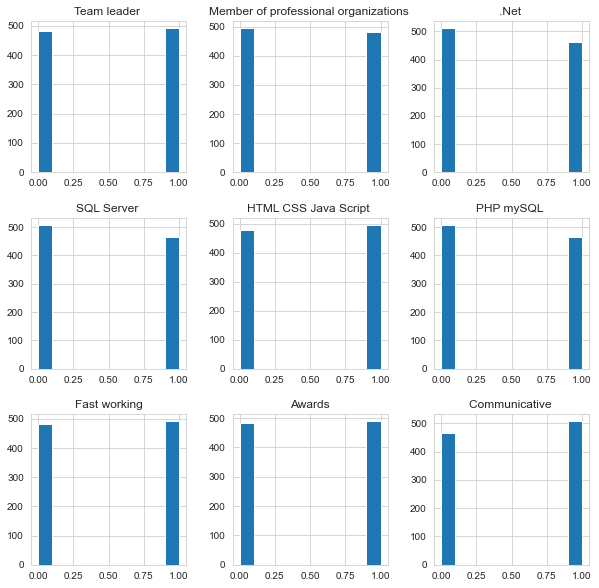

In [17]:
### Univariate Data Analysis
# plotting histogram of binary attributes to check their distribution 

# Remove column numbers 0, 1 and 3 from the DataFrame and keep rest
# Create a list of all column numbers to discard
columns_to_keep = [x for x in range(emp_data.shape[1]) if x not in [0,1,3]]
# keep columns by column number using iloc selection and store in a new data frame
data1 = emp_data.iloc[:, columns_to_keep]
#data1.info()
data1.hist(figsize=(10,10))

E:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Communicative ', ylabel='count'>

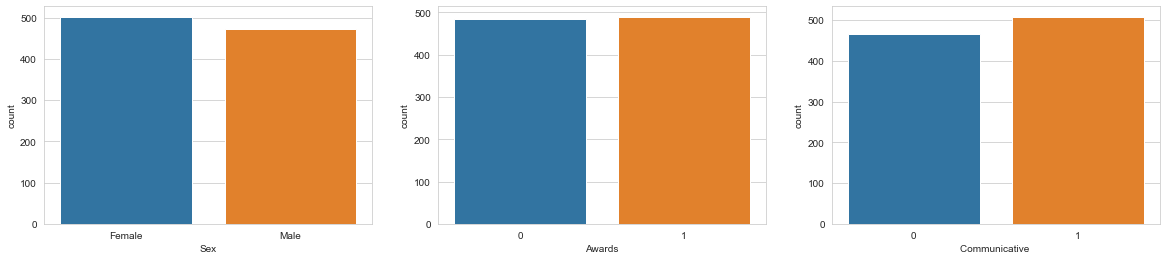

In [18]:
### Univariate Data Analysis
# plotting the count for Awards, Gender and communication separately

# plotting these 3 plots side by side
figure, ax =plt.subplots(1,3, figsize=(20,4))
sns.countplot(emp_data['Sex'], ax=ax[0])
#emp_data['Sex'].value_counts()
sns.countplot(emp_data['Awards'], ax=ax[1])
#emp_data['Awards'].value_counts()
sns.countplot(emp_data['Communicative '], ax=ax[2])
#emp_data['Communicative '].value_counts()

<AxesSubplot:xlabel='Age ', ylabel='Employment period '>

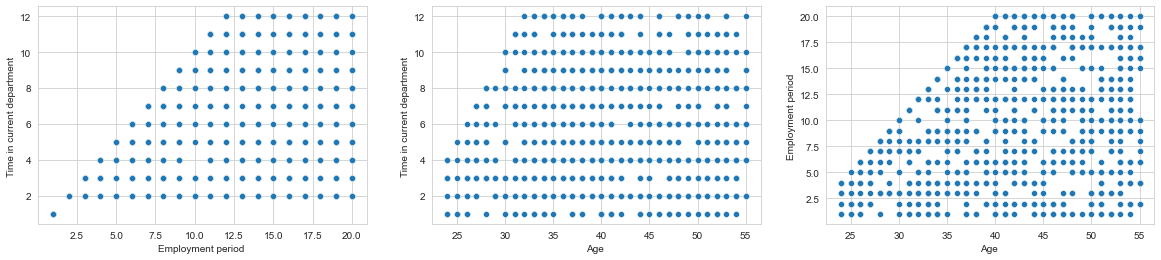

In [19]:
### BIvariate Data Analysis
# plotting the distribution between non-binary attributes

figure, ax =plt.subplots(1,3, figsize=(20,4))
sns.scatterplot(x=emp_data['Employment period '],y=emp_data['Time in current department '], ax=ax[0])
sns.scatterplot(x=emp_data['Age '],y=emp_data['Time in current department '], ax=ax[1])
sns.scatterplot(x=emp_data['Age '],y=emp_data['Employment period '], ax=ax[2])

<AxesSubplot:xlabel='Sex', ylabel='Employment period '>

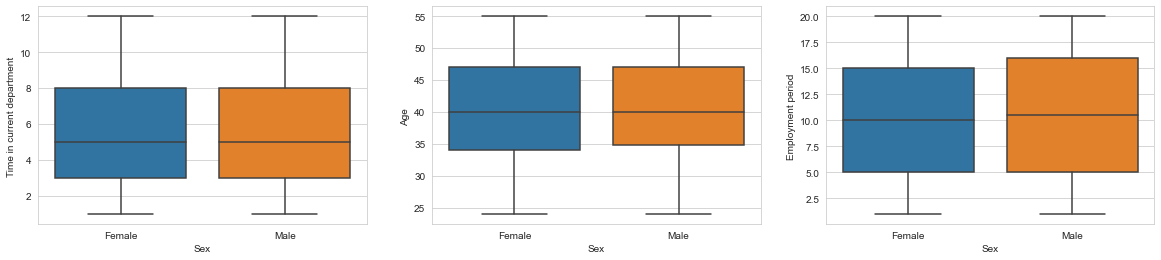

In [20]:
### Bivariate Data Analysis
# plotting boxplot for age, time in current department and employment period wrt Gender

figure, ax =plt.subplots(1,3, figsize=(20,4))
sns.boxplot(x=emp_data['Sex'],y=emp_data['Time in current department '], ax=ax[0])
sns.boxplot(x=emp_data['Sex'],y=emp_data['Age '], ax=ax[1])
sns.boxplot(x=emp_data['Sex'],y=emp_data['Employment period '], ax=ax[2])

<AxesSubplot:xlabel='Agegroup', ylabel='Time in current department '>

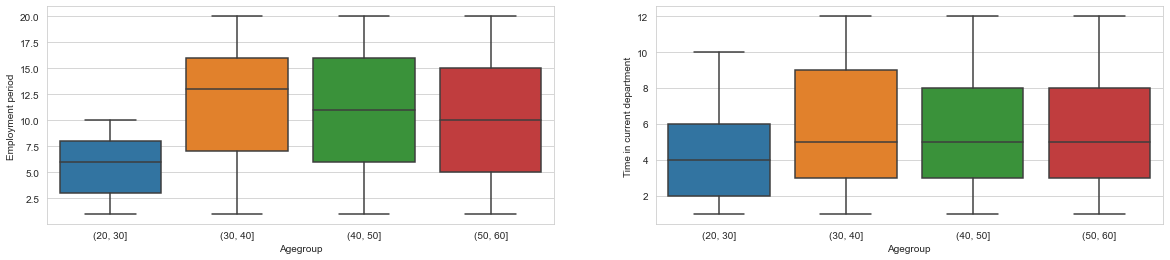

In [21]:
### Bivariate Data Analysis
# Distributing the age into bins for further mining
# plotting boxplot for time in current department and employment period wrt Agegroup

figure, ax =plt.subplots(1,2, figsize=(20,4))
emp_data['Agegroup']=pd.cut(emp_data['Age '] , [20,30,40,50,60])
#sns.boxplot(x=emp_data['Agegroup'], y=emp_data['Sex'], ax=ax[0])
sns.boxplot(x=emp_data['Agegroup'], y=emp_data['Employment period '], ax=ax[0])
sns.boxplot(x=emp_data['Agegroup'], y=emp_data['Time in current department '], ax=ax[1])

<AxesSubplot:xlabel='Agegroup', ylabel='Employment period '>

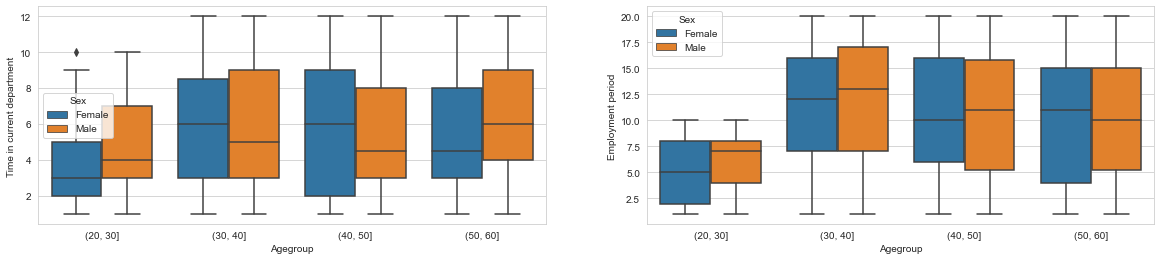

In [22]:
### Multivariate Data Analysis
# plotting boxplot for time in current department and employment period wrt Agegroup and gender

figure, ax =plt.subplots(1,2, figsize=(20,4))
sns.boxplot(x=emp_data['Agegroup'], y=emp_data['Time in current department '], hue = emp_data['Sex'], ax=ax[0])
sns.boxplot(x=emp_data['Agegroup'], y=emp_data['Employment period '], hue = emp_data['Sex'], ax=ax[1])
#sns.boxplot(x=emp_data['Sex'], y=emp_data['Age '], ax=ax[0])
#emp_data.info()

In [23]:
#df1 = emp_data.groupby('Agegroup')
#df1.head()


<AxesSubplot:xlabel='Agegroup', ylabel='count'>

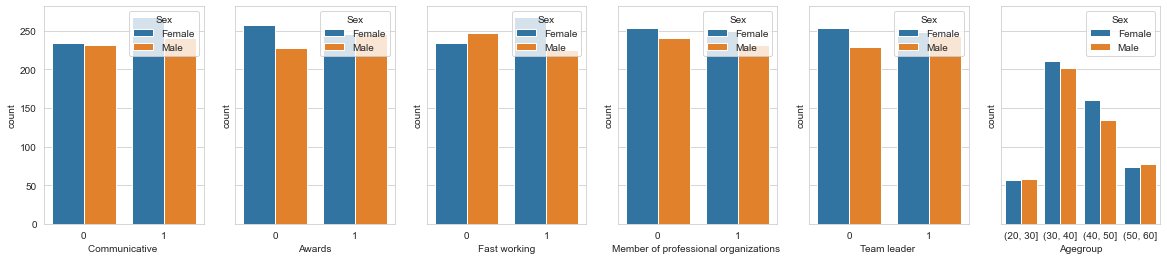

In [24]:
### Multivariate Data Analysis
# plotting countplot for attributes wrt gender

# fig = plt.figure(figsize=(20,4))
figure, ax =plt.subplots(1,6, figsize=(20,4), sharey=True)
sns.countplot(hue=emp_data['Sex'], x=emp_data['Communicative '], ax=ax[0])
sns.countplot(hue=emp_data['Sex'], x=emp_data['Awards'], ax=ax[1])
sns.countplot(hue=emp_data['Sex'], x=emp_data['Fast working'], ax=ax[2])
sns.countplot(hue=emp_data['Sex'], x=emp_data['Member of professional organizations '], ax=ax[3])
sns.countplot(hue=emp_data['Sex'], x=emp_data['Team leader '], ax=ax[4])
sns.countplot(hue=emp_data['Sex'], x=emp_data['Agegroup'], ax=ax[5])

<AxesSubplot:xlabel='SQL Server ', ylabel='count'>

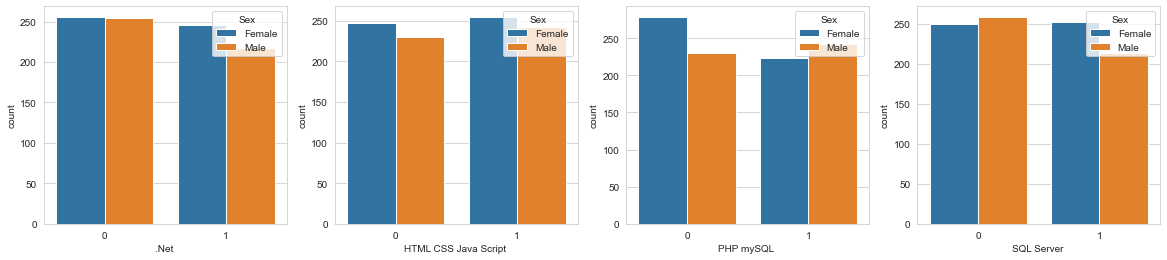

In [25]:
### Multivariate Data Analysis
# plotting countplot for skills wrt gender

figure, ax =plt.subplots(1,4, figsize=(20,4))
sns.countplot(hue=emp_data['Sex'], x=emp_data['.Net '], ax=ax[0])
sns.countplot(hue=emp_data['Sex'], x=emp_data['HTML CSS Java Script '], ax=ax[1])
sns.countplot(hue=emp_data['Sex'], x=emp_data['PHP mySQL '], ax=ax[2])
sns.countplot(hue=emp_data['Sex'], x=emp_data['SQL Server '], ax=ax[3])

<AxesSubplot:xlabel='Sex', ylabel='count'>

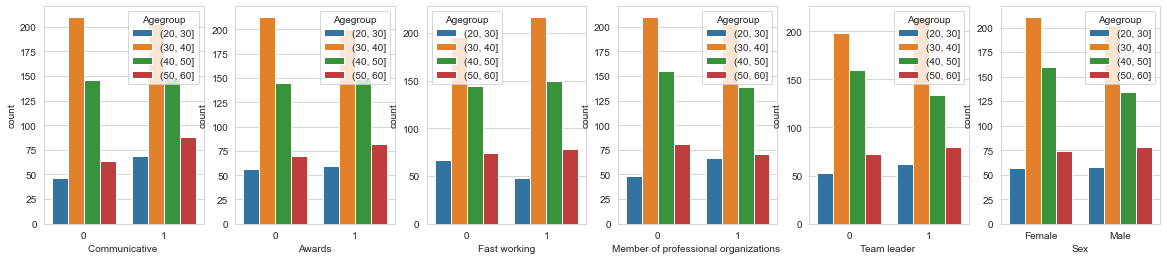

In [26]:
### Multivariate Data Analysis
# plotting countplot for attributes wrt agegroup

figure, ax =plt.subplots(1,6, figsize=(20,4))
sns.countplot(hue=emp_data['Agegroup'], x=emp_data['Communicative '], ax=ax[0])
sns.countplot(hue=emp_data['Agegroup'], x=emp_data['Awards'], ax=ax[1])
sns.countplot(hue=emp_data['Agegroup'], x=emp_data['Fast working'], ax=ax[2])
sns.countplot(hue=emp_data['Agegroup'], x=emp_data['Member of professional organizations '], ax=ax[3])
sns.countplot(hue=emp_data['Agegroup'], x=emp_data['Team leader '], ax=ax[4])
sns.countplot(hue=emp_data['Agegroup'], x=emp_data['Sex'], ax=ax[5])

<AxesSubplot:xlabel='SQL Server ', ylabel='count'>

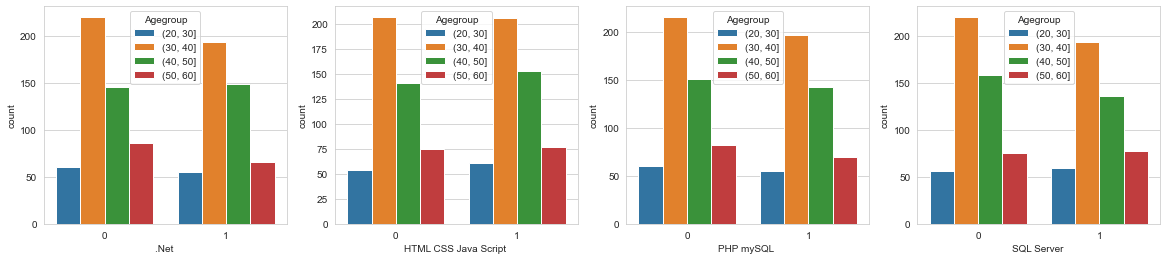

In [27]:
### Multivariate Data Analysis
# plotting countplot for skills wrt gender

figure, ax =plt.subplots(1,4, figsize=(20,4))
sns.countplot(hue=emp_data['Agegroup'], x=emp_data['.Net '], ax=ax[0])
sns.countplot(hue=emp_data['Agegroup'], x=emp_data['HTML CSS Java Script '], ax=ax[1])
sns.countplot(hue=emp_data['Agegroup'], x=emp_data['PHP mySQL '], ax=ax[2])
sns.countplot(hue=emp_data['Agegroup'], x=emp_data['SQL Server '], ax=ax[3])

E:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

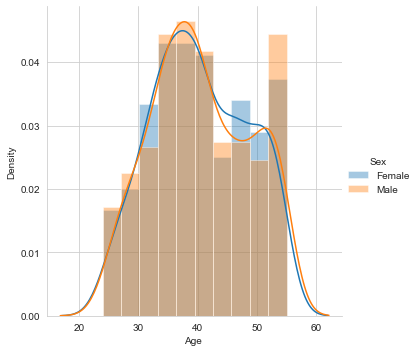

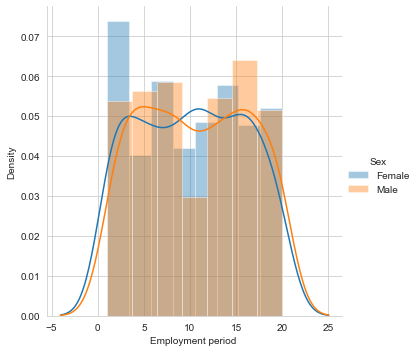

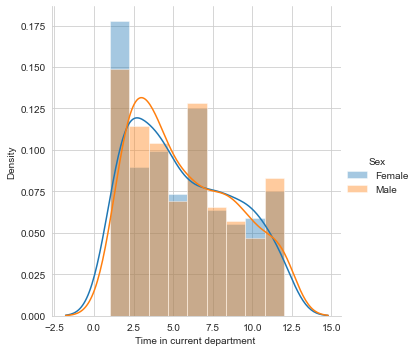

In [28]:
### Multivariate Data Analysis
# distribution of non-binary attributes amongst gender

sns.FacetGrid(emp_data, hue = 'Sex', height = 5).map(sns.distplot,'Age ').add_legend()
sns.FacetGrid(emp_data, hue = 'Sex', height = 5).map(sns.distplot,'Employment period ').add_legend()
sns.FacetGrid(emp_data, hue = 'Sex', height = 5).map(sns.distplot,'Time in current department ',).add_legend()

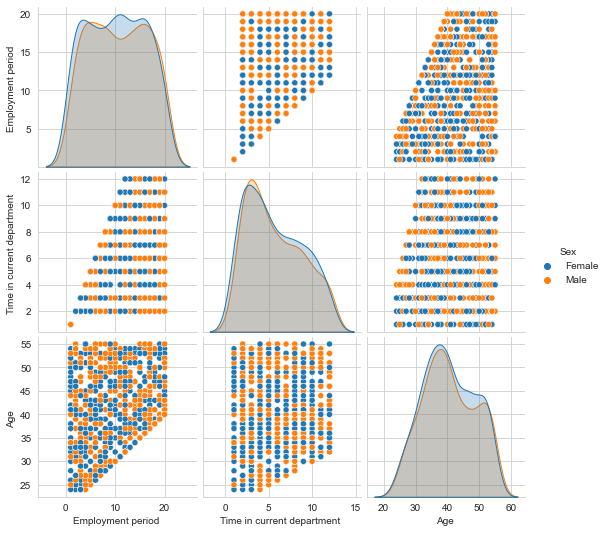

In [29]:
### Multivariate Data Analysis
# pairplot to check for any correlation among the non-binary attributes

sns.pairplot(emp_data, hue = "Sex", vars=['Employment period ', 'Time in current department ', 'Age '])

<AxesSubplot:>

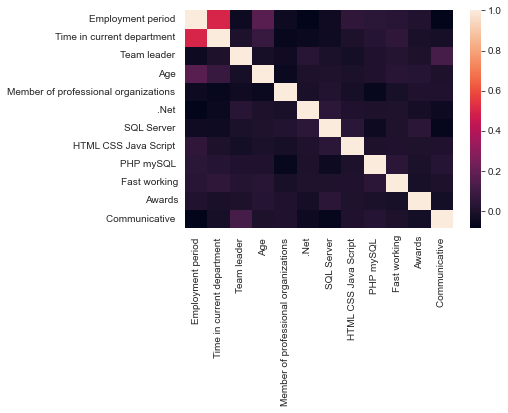

In [30]:
### Multivariate Data Analysis
# heatmap to check for any correlation among the attributes

sns.heatmap(emp_data.corr(),)

In [31]:
np.round(emp_data.corr(),2)

,Employment period,Time in current department,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
Employment period,1.00,0.50,-0.05,0.17,-0.05,-0.08,-0.04,0.05,0.04,0.03,0.01,-0.08
Time in current department,0.50,1.00,-0.00,0.07,-0.07,-0.05,-0.04,-0.00,0.02,0.05,-0.01,-0.02
Team leader,-0.05,-0.00,1.00,-0.02,-0.04,0.03,-0.01,-0.03,0.01,0.02,-0.00,0.11
Age,0.17,0.07,-0.02,1.00,-0.06,-0.00,0.00,-0.01,0.01,0.03,0.02,-0.00
Member of professional organizations,-0.05,-0.07,-0.04,-0.06,1.00,-0.01,0.02,-0.02,-0.07,-0.02,0.01,0.01
.Net,-0.08,-0.05,0.03,-0.00,-0.01,1.00,0.05,0.01,-0.00,0.00,-0.02,-0.05
SQL Server,-0.04,-0.04,-0.01,0.00,0.02,0.05,1.00,0.04,-0.05,0.00,0.04,-0.07
HTML CSS Java Script,0.05,-0.00,-0.03,-0.01,-0.02,0.01,0.04,1.00,-0.00,0.01,0.00,0.01
PHP mySQL,0.04,0.02,0.01,0.01,-0.07,-0.00,-0.05,-0.00,1.00,0.04,-0.01,0.02
Fast working,0.03,0.05,0.02,0.03,-0.02,0.00,0.00,0.01,0.04,1.00,-0.02,-0.00


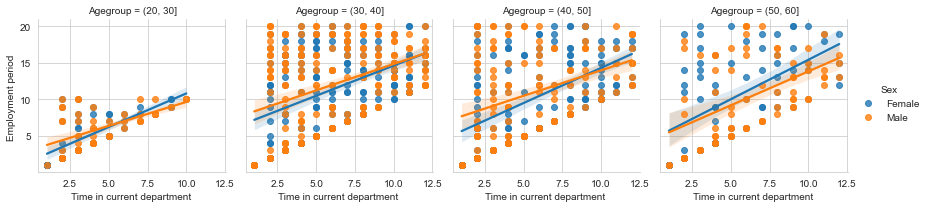

In [32]:
### Multivariate Data Analysis
# pairplot to check for any correlation for employment period an time in current department.
# very obvious correlation

graph = sns.FacetGrid(emp_data, col ='Agegroup', hue ='Sex')
# map the above form facetgrid with some attributes
graph.map(sns.regplot, 'Time in current department ', 'Employment period ').add_legend()
# show the object

In [33]:
emp_data.columns

Index(['Employment period ', 'Time in current department ', 'Team leader ',
       'Age ', 'Member of professional organizations ', '.Net ', 'SQL Server ',
       'HTML CSS Java Script ', 'PHP mySQL ', 'Fast working', 'Awards',
       'Communicative ', 'Sex', 'Agegroup'],
      dtype='object')

In [34]:
### formulate association rules 
# create another dataframe for binary attributes

data1['Gender']=data1['Sex'].replace({"Male":1 , 'Female':0})
data1.drop(['Sex'], axis=1, inplace=True)
data1.head()

C:\Users\HARSHV~1\AppData\Local\Temp/ipykernel_6916/3219450920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Gender']=data1['Sex'].replace({"Male":1 , 'Female':0})
E:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Team leader,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,Gender
ID,,,,,,,,,,
6723,1,1,1,1,0,1,1,0,1,0
8923,1,1,1,0,0,1,1,0,0,1
2322,0,0,0,1,1,0,1,0,1,0
235,1,1,0,1,0,1,1,1,0,1
9523,0,0,0,0,1,1,1,1,1,0


In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 6723 to 17170
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Team leader                            974 non-null    int64
 1   Member of professional organizations   974 non-null    int64
 2   .Net                                   974 non-null    int64
 3   SQL Server                             974 non-null    int64
 4   HTML CSS Java Script                   974 non-null    int64
 5   PHP mySQL                              974 non-null    int64
 6   Fast working                           974 non-null    int64
 7   Awards                                 974 non-null    int64
 8   Communicative                          974 non-null    int64
 9   Gender                                 974 non-null    int64
dtypes: int64(10)
memory usage: 116.0 KB


In [39]:
### formulate association rules 
## one hot encoding on the new data frame to ensure all attributes are binary

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

# identifying frequent itemsets
# a total of 46476 itemsets are possible
# this is of no significance till a minimum support for itemsets is identified
# min_support kept as 8% considering that frequent itemsets are part of atleast 80 transactions
# This would still result in 420 frequent itemsets, where lift is more than 1.
# Frequent itemsets dropped for lift < 1

data1_set = data1.applymap(encode_units)
frequent_itemsets = apriori(data1_set, min_support=0.08, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# rules.head()

       Team leader   Member of professional organizations   .Net   \
ID                                                                  
6723              1                                      1      1   
8923              1                                      1      1   
2322              0                                      0      0   
235               1                                      1      0   
9523              0                                      0      0   
...             ...                                    ...    ...   
6098              1                                      1      0   
12133             0                                      1      1   
854               1                                      1      0   
13444             0                                      0      0   
17170             1                                      0      1   

       SQL Server   HTML CSS Java Script   PHP mySQL   Fast working  Awards  \
ID                     

In [37]:
rules.count()

antecedents           420
consequents           420
antecedent support    420
consequent support    420
support               420
confidence            420
lift                  420
leverage              420
conviction            420
dtype: int64

In [38]:
### formulate association rules 
## finally only those association rules were considered where the confidence is greater that 57%

rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.57)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Team leader ),(Communicative ),0.504107,0.521561,0.291581,0.578411,1.109001,0.028659,1.134849
85,"(Communicative , .Net )",(Team leader ),0.236140,0.504107,0.139630,0.591304,1.172974,0.020591,1.213356
120,"(HTML CSS Java Script , Team leader )",(Communicative ),0.250513,0.521561,0.148871,0.594262,1.139393,0.018213,1.179184
153,"(Communicative , Fast working)",(Team leader ),0.263860,0.504107,0.154004,0.583658,1.157805,0.020990,1.191071
154,"(Fast working, Team leader )",(Communicative ),0.259754,0.521561,0.154004,0.592885,1.136753,0.018527,1.175196
161,"(Communicative , Awards)",(Team leader ),0.255647,0.504107,0.152977,0.598394,1.187037,0.024104,1.234774
162,"(Team leader , Awards)",(Communicative ),0.252567,0.521561,0.152977,0.605691,1.161305,0.021249,1.213362
407,"(Communicative , HTML CSS Java Script , Awards)",(Team leader ),0.131417,0.504107,0.080082,0.609375,1.208821,0.013834,1.269487
409,"(HTML CSS Java Script , Team leader , Awards)",(Communicative ),0.125257,0.521561,0.080082,0.639344,1.225829,0.014753,1.326582
